# Topic 9 - Differential Equations
### Eun Ju Jong 
### CIS 397
### Dr. Hallenbeck

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def movespines():
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))

## Exercise 1 - Forward Euler
Using the Forward Euler method to solve 3 differential equations.
### 1) Disease Model:
The rate of infection of a particular population is given by:
$\ \displaystyle\frac{dp}{dt} = \frac{1 - p}{4}$
<br>
where p is the fraction of people who are currently infected (p = 0 →nobody, and p = 1 → everyone), and t is time in years.
#### Make a plot of the fraction of the population infected as a function of time for an initial p(0) = 0.01 (1% infected).

In [3]:
def euler(y_0, f, t):
    t_0 = t[0]
    dt = t[1] - t[0]
    y = [y_0]

    for i in range(len(t) - 1):
        y.append(y[i] + dt*f(t[i], y[i]))

    return y

In [4]:
def infection_rate(t, y):
    return (1 - y) / 4

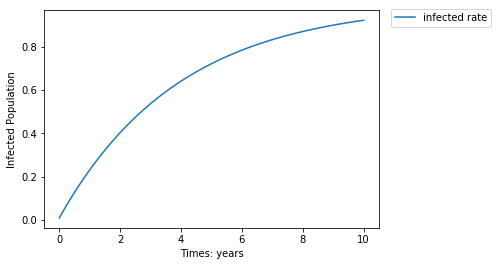

In [5]:
t = np.linspace(0, 10, 100)

p_0 = 0.01 #1% of the population got infected

plt.plot(t, euler(p_0, infection_rate, t), label = "infected rate")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.35, 1.03))
plt.xlabel("Times: years")
plt.ylabel("Infected Population")

plt.show()

$\rightarrow$In a case where the initial infected rate of the population is 1%, as time passes, the percentage of the population that is infected will gradually increase. By approximately 20 years, the percentage of the infected population will be 100%.

### 2) Air Resistance:
The velocity of a vertical projectile can be written by:
$\displaystyle\frac{dv}{dt} = -g-kv$
<br>
where g is acceleration due to gravity ($10 m/s^2$), and k is a drag coefficient.
#### Make a plot of velocity from 0 to 20 s, with a starting velocity of 100 m/s, and a drag coefficient of 0.5 $s^{-1}$.

In [6]:
def Vprojectile_v(t, v):
    return -g-k*v

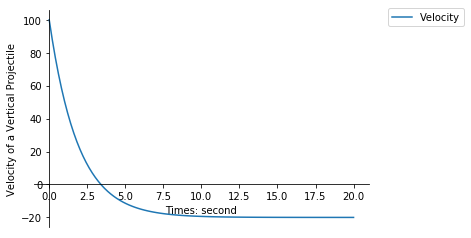

In [7]:
t = np.linspace(0, 20, 100)

g = 10 #gravity(m/s2)
k = 0.5 #a drag coefficient (s-1)
v_0 = 100

plt.plot(t, euler(v_0, Vprojectile_v, t), label = "Velocity")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.3, 1.03))
plt.xlabel("Times: second")
plt.ylabel("Velocity of a Vertical Projectile")
movespines()

plt.show()

$\rightarrow$ Starting with an initial velocity of 100 m/s, as time increases from 0 second to 20 seconds, the velocity of the vertical projectile gradually decreases showing a tendency of an inverse exponencial function assuming the directionof the projectile is opposit to the direction of the gravitational volocity. At the highest point of the vertical projectile is zero, which represent a constant velocity of the projectile.

### 3) Stiff Differential Equations:
Consider the differential equation
$\displaystyle\frac{dy}{dt} = -2y$, which for y(0) = 1 has the exact solution $e^{-2t}$.
#### Plot the exact solution, along with the solution the Forward Euler method gives for dt = 0.01, 0.1, 0.5, and 1.

In [8]:
def stiff_eq(t, y):
    return -2 * y

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


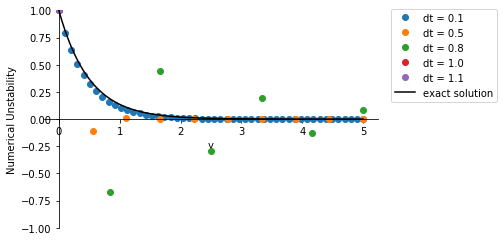

In [9]:
dt = [0.1, 0.5, 0.8, 1.0, 1.1]
y_0 = 1

for i in range(len(dt)):
    t = np.linspace(0, 5, np.ceil(5/dt[i]))
    plt.plot(t, euler(y_0, stiff_eq, t), 'o', label = "dt = " + str(dt[i]))
    
t = np.linspace(0, 5, 100)
plt.plot(t, np.e**(-2*t), color = 'black', label = "exact solution")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.03))
plt.ylim(-1, 1)
plt.xlabel("y")
plt.ylabel("Numerical Unstability")
movespines()

plt.show()

#### What do you see that is wrong?
$\rightarrow$Generally speaking, we expect numerical solution to be approximately similar to the exact solution. Yet, from the graph above, we can see the exhibition of greater variation of points according to the step size; the greater the step size is, the values of numerical solution are off from the exact value with greater magnitudes. 

#### Zoom in on your plot. Do you get qualitatively correct behavior even with dt = 0.01?

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


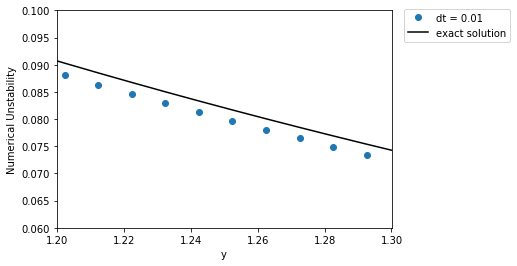

In [10]:
t = np.linspace(0, 5, np.ceil(5/0.01))

plt.plot(t, euler(y_0, stiff_eq, t), 'o', label = "dt = 0.01")
plt.plot(t, np.e**(-2*t), color = 'black', label = "exact solution")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.03))
plt.xlabel("y")
plt.ylabel("Numerical Unstability")
plt.ylim(0.06, 0.1)
plt.xlim(1.2, 1.3)
plt.show()

$\rightarrow$When dt = 0.01, the steps size is comparatively small. Therefore, it is not obvious to see the variation of the numerical values unless we closely zoom into certain points. As we can see above, the points for numerical solution when df = 0.01 for a differential equation do not precisely match the exact solution function. In other words, the numerical values vary from the exact values with small errors.

## Exercise 2 - Forward Euler (2nd Order)
#### Implement the 2nd Order version of Forward Euler and test the implementation for a Mass on a Spring; The Simple Harmonic Oscillator.
Differential equation: $\displaystyle\frac{d^2y}{dt^2} = -\frac{k}{m}y$, where k is the spring constant, and m is the mass of the object.
<br>
- $k = 5 N/m$ and $m = 1kg$
- $y(0) = 1$ and $\displaystyle\frac{dy}{dt}(0) = 0$
- $dt = 0.02s$

In [11]:
def euler_2nd(y_0, dydt_0, f, t):
    dt = t[1] - t[0]
    y = [y_0]
    dydt = [dydt_0]
    
    for i in range(len(t) - 1):
        dydt.append(dydt[i] + dt*f(t[i], y[i]))
        y.append(y[i] + dt*dydt[i])
        
    return y

In [12]:
def spring_mass(t, y):
    return -k / m * y

In [13]:
def exact_solution(t):
    return np.cos(np.sqrt(k/m)*t)

- The exact solution: $y(t) = \cos\left(\displaystyle\sqrt{\frac{k}{m}}\cdot t\right)$

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


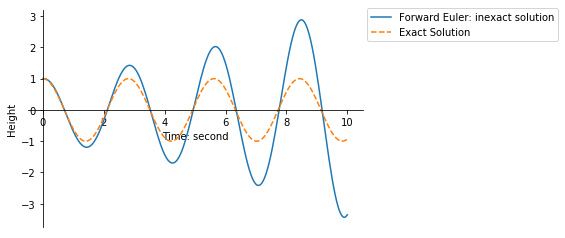

In [14]:
y_0 = 1
dydt_0 = 0
t = np.linspace(0, 10, np.ceil(10/0.05))
k = 5
m = 1

plt.plot(t, euler_2nd(y_0, dydt_0, spring_mass, t), label = "Forward Euler: inexact solution")
plt.plot(t, exact_solution(t), '--', label = "Exact Solution")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1.03))
plt.xlabel("Time: second")
plt.ylabel("Height")
movespines()

plt.show()

#### What do you observe happens to your inexact solution over time?
$\rightarrow$ The spring mass of the inexact solution derives around the exact solution and does not match the exact solution. Also, the disagreement becomes greater overtime.

#### Does it get better or worse as dt becomes smaller? How small of a dt is required for you to not notice the change over 10 s?
$\rightarrow$ The tendency of derivation reduces. The function becomes closer to the exact solution and it is expected to be approximately mathcing the exact solution if the step size is very small.  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


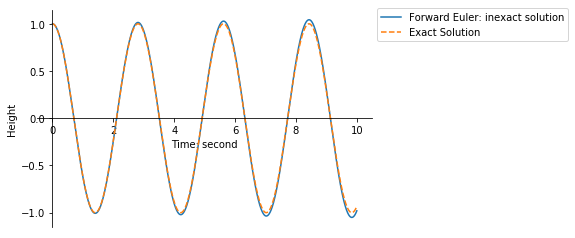

In [15]:
t = np.linspace(0, 10, np.ceil(10/0.002))

plt.plot(t, euler_2nd(y_0, dydt_0, spring_mass, t), label = "Forward Euler: inexact solution")
plt.plot(t, exact_solution(t), '--', label = "Exact Solution")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.6, 1.03))
plt.xlabel("Time: second")
plt.ylabel("Height")
movespines()

plt.show()

#### The Forward Euler Method is often described as not conserving energy. Why?
$\rightarrow$ As a spring bounds back and forward, the height changes. If the energy is conservative, the height that the spring reaches for every single bound should not change. Yet, as the repeats the motion of bouncing, the height of the spring becomes greater and the magnitude of the chnages in height becomes greater as well. 

## Exercise 3 - Verlet Method
#### Implement the Verlet Method for solving differential equations.

In [16]:
def verlet(y_0, dydt_0, f, t):
    dt = t[1] - t[0]
    y = [y_0]
    dydt = [dydt_0]
    
    y_1 = y[0] + dydt[0]*dt + 0.5*f(t[0], y[0])*dt**2
    y.append(y_1)
    
    for i in np.arange(1, len(t) - 1):
        y.append(2*y[i] - y[i-1] + f(t[i], y[i])*dt**2)

    return y

#### Approximate the shift in phase of the cosine between the two functions with the following equation:
$$\bigtriangleup\phi = \big(\arccos(y_{approx}) - \arccos(y_{true})\big)\displaystyle\frac{180}{\pi}$$

In [17]:
def del_func(t, y):
    return (np.arccos(y) - np.arccos())*180/np.pi

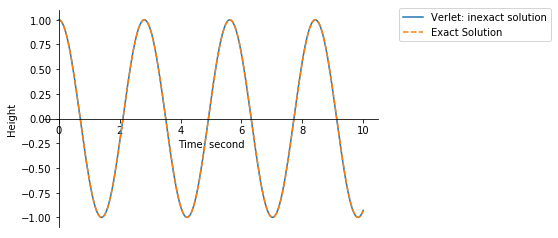

In [18]:
t = np.linspace(0, 10, int(np.ceil(10/0.05)))

plt.plot(t, verlet(y_0, dydt_0, spring_mass, t), label = "Verlet: inexact solution")
plt.plot(t, exact_solution(t), '--', label = "Exact Solution")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.53, 1.03))
plt.xlabel("Time: second")
plt.ylabel("Height")
movespines()

plt.show()

#### For a value of dt = 0.05 s, do you notice any disagreement between your solution and the exact one?
$\rightarrow$ The inexact solution According to the graph above, the inexact solution and the exact solution does not have disagreements.
#### What if you set dt = 0.2 s?
$\rightarrow$ Overtime, the disagreement of the inexact solution gets larger and the phase shift of the function happens with a larger degree. 

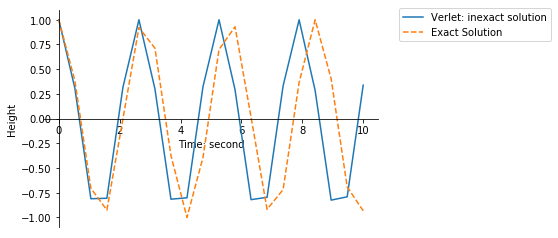

In [19]:
t = np.linspace(0, 10, int(np.ceil(10/0.5)))
plt.plot(t, verlet(y_0, dydt_0, spring_mass, t), label = "Verlet: inexact solution")
plt.plot(t, exact_solution(t), '--', label = "Exact Solution")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.53, 1.03))
plt.xlabel("Time: second")
plt.ylabel("Height")
movespines()

plt.show()

In [20]:
def d_phi(y_approx, y_true):
    return abs((np.arccos(y_approx) - np.arccos(y_true)))*(180/np.pi)

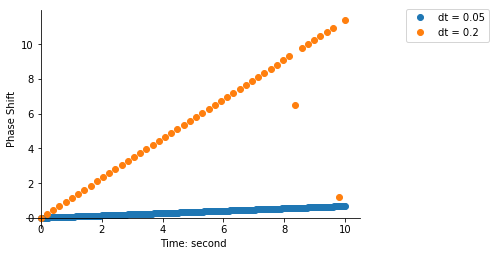

In [21]:
t = np.linspace(0, 10, int(np.ceil(10/0.05)))
plt.plot(t, d_phi(verlet(y_0, dydt_0, spring_mass, t), exact_solution(t)), 'o', label = 'dt = 0.05')

t_2 = np.linspace(0, 10, int(np.ceil(10/0.2)))
plt.plot(t_2, d_phi(verlet(y_0, dydt_0, spring_mass, t_2), exact_solution(t_2)), 'o', label = 'dt = 0.2')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1.03))
plt.xlabel("Time: second")
plt.ylabel("Phase Shift")
movespines()

plt.show()

#### What do you see?
$\rightarrow$ The degree of phase shift that happens to the inexact solution is grater with a larger step size and the magnitude of the phase shift gets larger in long run. 

## Bonus! - Lu's Equation
#### Plot solutions to the differential equation:
$y^2 - xy = 0$

In [30]:
def lu_1(x):
    return x

In [31]:
def verlet(y_0, dydt_0, f, t):
    dt = t[1] - t[0]
    y = [y_0]
    dydt = [dydt_0]
    
    y_1 = y[0] + dydt[0]*dt + 0.5*f(t[0])*dt**2
    y.append(y_1)
    
    for i in np.arange(1, len(t) - 1):
        y.append(2*y[i] - y[i-1] + f(t[i])*dt**2)

    return y

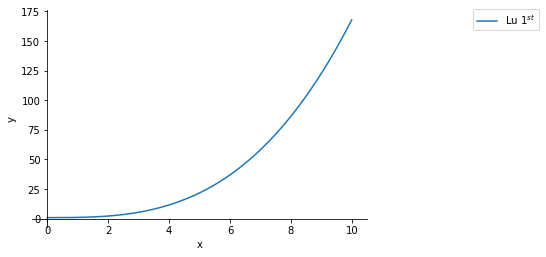

In [32]:
x = np.linspace(0, 10, int(np.ceil(10/0.02)))
plt.plot(x, verlet(y_0, dydt_0, lu_1, x), label = "Lu $1^{st}$")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.53, 1.03))
plt.xlabel("x")
plt.ylabel("y")
movespines()

plt.show()

#### Plot solutions to Lu's 2nd Equation: 
$\displaystyle\frac{d^2y}{dx^2} - xy = 0$

In [34]:
def lu_2(x, y):
    return x*y

In [36]:
def verlet(y_0, dydt_0, f, t):
    dt = t[1] - t[0]
    y = [y_0]
    dydt = [dydt_0]
    
    y_1 = y[0] + dydt[0]*dt + 0.5*f(t[0], y[0])*dt**2
    y.append(y_1)
    
    for i in np.arange(1, len(t) - 1):
        y.append(2*y[i] - y[i-1] + f(t[i], y[i])*dt**2)

    return y

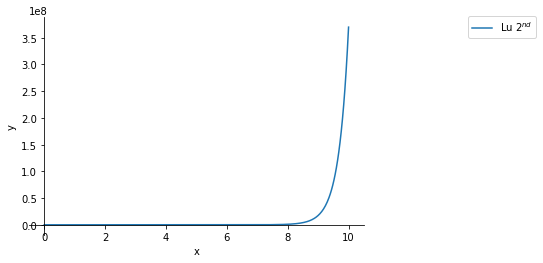

In [37]:
x = np.linspace(0, 10, int(np.ceil(10/0.02)))
plt.plot(x, verlet(y_0, dydt_0, lu_2, x), label = "Lu $2^{nd}$")

plt.legend(loc = 'upper right', bbox_to_anchor=(1.53, 1.03))
plt.xlabel("x")
plt.ylabel("y")
movespines()

plt.show()